# Keras 101: Designing your Neural Network - How Many Neurons in Each Hidden Layer?

When starting out one of the hardest parts about building a neural network is the question of network design. How many hidden layers? How many neurons do i want in each hidden layer?

The aim of this notebook is to understand how varying the number of neurons in a single hidden layer of a neural network changes the output of your network and help us answer the question of "How many neurons do i want in each hidden layer?".

We will be looking at this question from a first principles approach, starting with the most funamental componants of a neural network (the neuron) and building up from there.

In order to begin we need a problem to solve, here we will be looking at a common problem for which neural networks are applied, that of classification.

Classification problems often revolve around a dataset described by multiple features and a set of known classifications for which each item in the dataset belongs to (groundtruth data). This dataset could be anything from images of handwritten numbers to sorted collections of cats and dogs. Here a neural network can be constructed and trained using this groundtruth dataset with the hope of being able to predict a classifcation for data where the classification is unknown.

In general the number of hidden units depends on a large number of variables:

-the numbers of input and output units
-the number of training cases
-the amount of noise in the targets
-the complexity of the function or classification to be learned
-the architecture
-the type of hidden unit activation function
-the training algorithm
regularization

To begin looking at this problem we need to import the necessary packages.

In [23]:
import keras
import tensorflow as tf
from sklearn.datasets import make_moons, make_circles
import keras.backend as K
import matplotlib.pyplot as plt
import numpy as np

We will now generate some classification data for us to solve. This dataset consists of an array of features x1 and x2 where each pair of features x1 and x2 (features array) is assigned a class of 0 or 1 (labels array).

In [24]:
dataset = make_moons(n_samples=300,noise=0.20, random_state=1)
#dataset = make_circles(n_samples=300,noise=0.20, factor=0.1,random_state=1)

features = dataset[0]
labels = dataset[1]

features[:,0] = (features[:,0]+1.5)/3.0
features[:,1] = (features[:,1]+1.5)/3.0

x1_min = np.amin(features[:,0])
x1_max = np.amax(features[:,0])
x2_min = np.amin(features[:,1])
x2_max = np.amax(features[:,1])

With only 2 features per item in the dataset we are able to plot the dataset and take a look at the distribution of the two classes. The aim of this neural network is to constuct a decision boundary that seperates the two classes of data. Here we can begin to imagine how we might draw a decision boundary to clasify between the two.

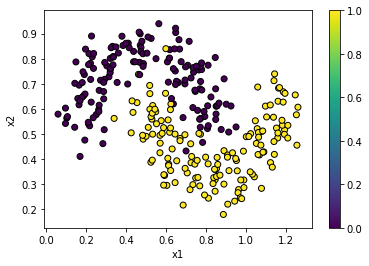

In [25]:
plt.scatter(features[:,0],features[:,1],edgecolor="black",linewidth=1,c=labels)
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar()
plt.show()

We will begin to solve this problem by looking at the most simple neural network possible, that of a single neuron, strictly speaking this is not a neual network but a linear classifier however as you will see a neural network is just an array of neurons all connected to one another to produce a network.

Here the two input features x1 and x2 are fed into a single output neuron that classifies each datapoint as a 1 or 0 using the activation function sigmoid.

In [30]:
layers = []
layers.append(keras.layers.Dense(1, input_dim = 2, activation="sigmoid"))
model = keras.Sequential(layers)

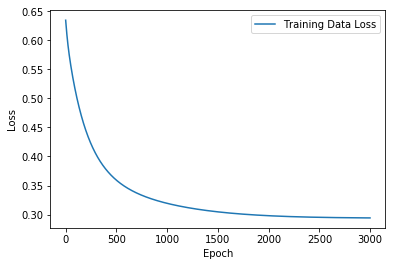

In [31]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy', metrics=['binary_accuracy', 'categorical_accuracy'])

history = model.fit(features, labels, batch_size=features.shape[0],epochs=3000, verbose=0)

loss = history.history['loss']
epoch = np.arange(0, len(loss))

plt.plot(epoch,loss, label='Training Data Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

By plotting the resulting decision boundary after the training has converged we see that we do indeed have a linear classifier. In fact given our inputs into the neuron no matter how much we train the network we will always be left with a linear decision boundary seperating the two data classes.

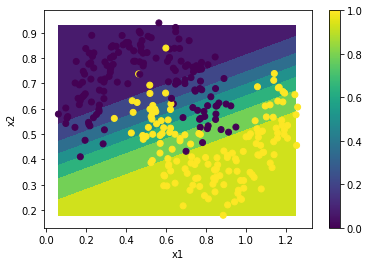

In [32]:
xx, yy = np.meshgrid(np.arange(x1_min,x1_max,0.01),np.arange(x2_min,x2_max,0.01))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z)
plt.scatter(features[:,0],features[:,1],c=labels)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()

Why is this? in order to understand this we must look at how we pass information through the neuron. 

When the inputs x1 and x2 are passed into the neuron a mathematical operation is applied, specifically each input is multiplied by a weight call them w1 and w2, and these are summed with the addition of a bias (b). 

Formally z = x1*w1+x2*w2+b

Where z is the output of this mathematical operation, this equation may look familiar, it is infact the equation of for a linear line commonly denoted y = mx+c. It is this that dictates the shape of our decision boundary. During training of the network it is these weights that are updated via the backpropergation algorithm.

Now here we look to classify inputs into the neuron as a 1 and 0, thus we need the neuron to output values between 0 and 1. This is achieved by applying a mathematical operation onto z that converges between 1 and 0, specifically here we use the sigmoid function.

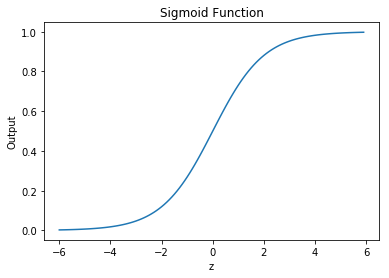

In [35]:
x = np.arange(-6,6,0.1)
y = 1/(1+np.exp(-x))
plt.plot(x,y)
plt.title("Sigmoid Function")
plt.ylabel('Output')
plt.xlabel('z')
plt.show()

As stated previously the single neuron makes up the most basic componant of a neural network. Between inputing the features and the output neuron we can place an array of hidden layers, here each layer consists of any number of neurons stacked ontop of each other. Each hidden layer feeds into the next hidden layer until the output neuron is reached.

Here we are discusing the question of how many neurons should we populate these hidden layers with, as such we will be considering the simplest case that of a single hidden layer placed between the input and output layers, you will see in later noteboks that this is often sufficent for most classification problems.

So we are now going to be considering a network with a single hiddiden layer of one neuron positioned between the input and output layers. The simplest form this could take is that of a single neuron populating this single hidden layer however at this point we would have nothing more than a linear classifier and so we shall quickly move past this. If you are not convinced (as you probably shouldn't be) then feel free to adapt the model above to observe the reuslting decision boundary.

The task now is to descirbe how adding more neurons to a single hidden layer changes the shape and complexity of the decision boundary we can describe with our network.

We will see that by increasing the number of neurons in a single hidden layer that then feeds into a single output neuron we are able to represent any single function that maps one finite space onto another. 

As each neuron in the hidden layer acts as a single linear classifier by adding more neurons to a single hidden layer we feed more linear componants into the output neuron where the linear componants are essentially normalised, the result is a sum of linear componants that allows any single function to be described.

To demonstrate this lets add a second neuron into our hidden layer.

In [36]:
layers = []
layers.append(keras.layers.Dense(2, input_dim = 2, activation="sigmoid"))
layers.append(keras.layers.Dense(1,activation="sigmoid"))

model = keras.Sequential(layers)

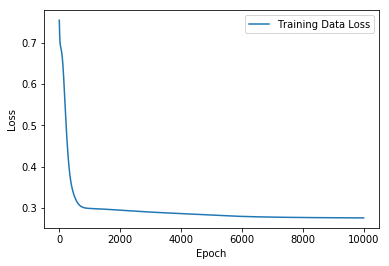

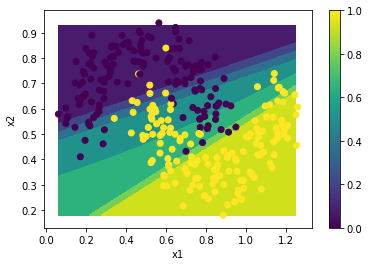

In [37]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.01), loss='binary_crossentropy', metrics=['binary_accuracy', 'categorical_accuracy'])

history = model.fit(features, labels, batch_size=features.shape[0],epochs=10000, verbose=0)

loss = history.history['loss']
epoch = np.arange(0, len(loss))

plt.plot(epoch,loss, label='Training Data Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
xx, yy = np.meshgrid(np.arange(x1_min,x1_max,0.01),np.arange(x2_min,x2_max,0.01))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z)
plt.scatter(features[:,0],features[:,1],c=labels)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()

Looking at the resulting decision boundary it should be evident that the above decision boundary is the summation of two linear decision boundaries feed through an output neuron. 

In order to confirm this we can take a look at the output of the neurons in the first layer. This does indeed confirms that both neurons in the hidden layer output a linear decision boundary.

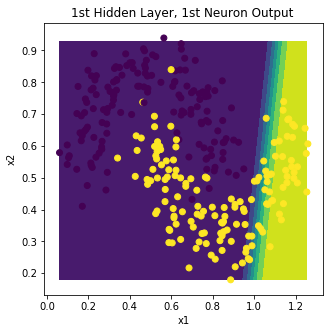

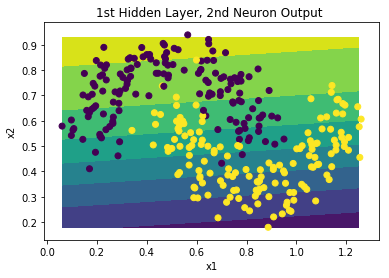

In [33]:
fig = plt.figure(figsize=(5, 5))
xx, yy = np.meshgrid(np.arange(x1_min,x1_max,0.01),np.arange(x2_min,x2_max,0.01))

Hidden_layer_output = K.function([model.layers[0].input],[model.layers[0].output])
out = Hidden_layer_output([np.c_[xx.ravel(),yy.ravel()]])[0]

out1 = out[:,[0]].reshape(xx.shape)
out2 = out[:,[1]].reshape(xx.shape)

plt.title('1st Hidden Layer, 1st Neuron Output ')
plt.contourf(xx,yy,out1)
plt.scatter(features[:,0],features[:,1],c=labels)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

plt.title('1st Hidden Layer, 2nd Neuron Output ')
plt.contourf(xx,yy,out2)
plt.scatter(features[:,0],features[:,1],c=labels)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

We can then take the output of these two neurons in the hidden layer and pass it through the final output layer to confirm our final decision boundary.

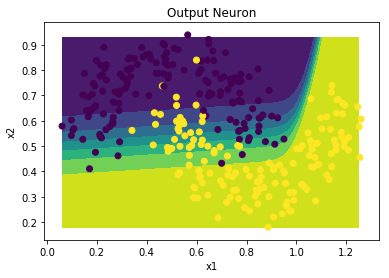

In [34]:
Output_layer_output = K.function([model.layers[1].input],[model.layers[1].output])
out3 = Output_layer_output([out])[0].reshape(xx.shape)

plt.contourf(xx,yy,out3)
plt.title('Output Neuron')
plt.scatter(features[:,0],features[:,1],c=labels)
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

Now let's have a look at the shape of the data we are classifiying inorder to get an idea of the model this data requires.

From the distribution of the two classes in our data set we can see that a decision boundary resebling that of a 'Z' rotated 90 degreed anti-clock wise would describe a good general decision boundary seperating the two classes.

As such we can see that the summation of three linear decision boundares would perfectly describe the decision boundary we require for our classification data, so let's add a third neuron to our hidden layer and test this hypothesis.

In [41]:
layers = []
layers.append(keras.layers.Dense(3, input_dim = 2, activation="sigmoid"))
layers.append(keras.layers.Dense(1, activation="sigmoid"))

model = keras.Sequential(layers)

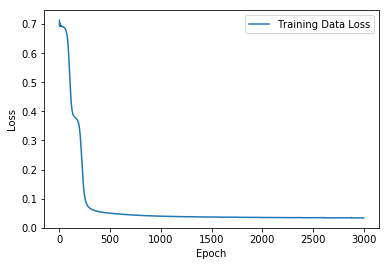

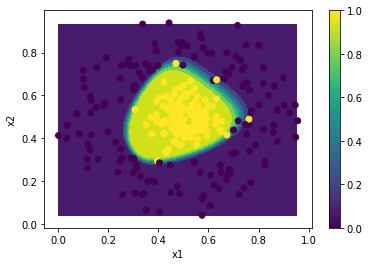

In [42]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.1), loss='binary_crossentropy', metrics=['binary_accuracy', 'categorical_accuracy'])

history = model.fit(features, labels, batch_size=features.shape[0],epochs=3000, verbose=0)

loss = history.history['loss']
epoch = np.arange(0, len(loss))

plt.plot(epoch,loss, label='Training Data Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

xx, yy = np.meshgrid(np.arange(x1_min,x1_max,0.01),np.arange(x2_min,x2_max,0.01))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z)
plt.scatter(features[:,0],features[:,1],c=labels)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()

You can see that we do indeed get a decisioun boundary that describes a good generalisation of the classification between the two classes in our data set. We can also plot the output of the hidden layer neurons and look at the linear componants that make up this final solution.

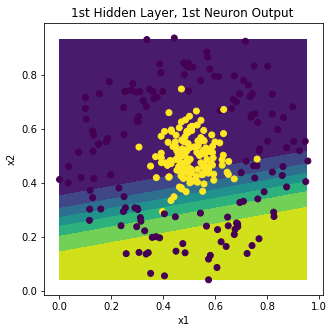

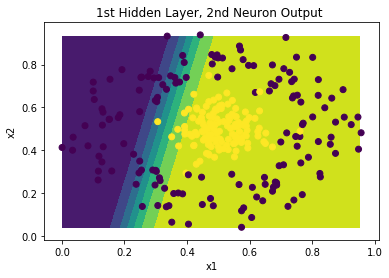

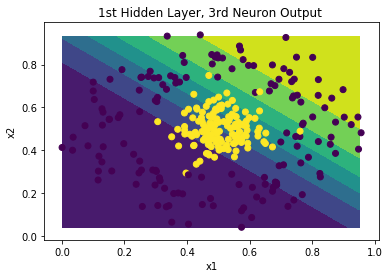

In [43]:
fig = plt.figure(figsize=(5, 5))
xx, yy = np.meshgrid(np.arange(x1_min,x1_max,0.01),np.arange(x2_min,x2_max,0.01))

Hidden_layer_output = K.function([model.layers[0].input],[model.layers[0].output])
out = Hidden_layer_output([np.c_[xx.ravel(),yy.ravel()]])[0]

out1 = out[:,[0]].reshape(xx.shape)
out2 = out[:,[1]].reshape(xx.shape)
out3 = out[:,[2]].reshape(xx.shape)

out2 = out[:,[1]].reshape(xx.shape)
plt.title('1st Hidden Layer, 1st Neuron Output ')
plt.contourf(xx,yy,out1)
plt.scatter(features[:,0],features[:,1],c=labels)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

plt.title('1st Hidden Layer, 2nd Neuron Output ')
plt.contourf(xx,yy,out2)
plt.scatter(features[:,0],features[:,1],c=labels)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

plt.title('1st Hidden Layer, 3rd Neuron Output ')
plt.contourf(xx,yy,out3)
plt.scatter(features[:,0],features[:,1],c=labels)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

You may be wondering the effect of adding more neurons to the single hidden layer of our network. We can add any number of neurons and the result will be a more complex decision boundary, a more complex decision boundary allows for those data points in the data that deviate from the general distribution of the two classes (outliers) to be incorperated into the decision boundary, this is because the loss function will continue to be minimised when the network fits these points, this is termed overfitting (More on this later).

In [16]:
layers = []
layers.append(keras.layers.Dense(16, input_dim = 2, activation="sigmoid"))
layers.append(keras.layers.Dense(1, activation="sigmoid"))

model = keras.Sequential(layers)

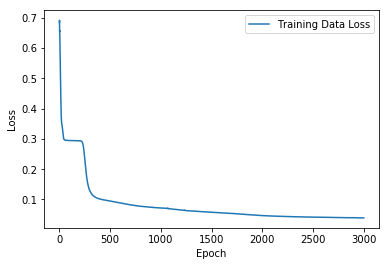

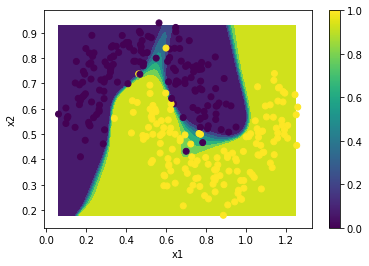

In [18]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.1), loss='binary_crossentropy', metrics=['binary_accuracy', 'categorical_accuracy'])

history = model.fit(features, labels, batch_size=features.shape[0],epochs=4000, verbose=0)

loss = history.history['loss']
epoch = np.arange(0, len(loss))

plt.plot(epoch,loss, label='Training Data Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
xx, yy = np.meshgrid(np.arange(x1_min,x1_max,0.01),np.arange(x2_min,x2_max,0.01))

z = model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

plt.contourf(xx,yy,z)
plt.scatter(features[:,0],features[:,1],c=labels)
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()
plt.show()

From the above result we can see that when chossing the number of neurons to populate our hidden layers the objective is to produce a model with enough neurons that the resulting decision boundary is complex enough to form a good general fit with a low enough loss function whilst avoiding overfitting the data.

When the feature dimensions are greater than two it can be tricky to estimate from a decision boundary if the data is overfit, a more empirical measure for this is discussed in later notebooks.

Therefore in general now we understand the role of varying the number of neurons in a single hidden layer adds an increasingly non-linear componant to our model. When designing a neural network you should generally increase the number of neurons in the layer up to the point where the model begins to overfit the data.

# In Summary:

1) A single neuron acts as a linear clasifier, where only a linear decision boundary can be generated.

2) Each neuron in a single hidden layer acts as a different linear representation of the input data. When all neurons in a layer are passed to an output neuron the result is a sum of all linear componants, resulting in the ability to model nonlinear classification problems.

3) This allows the network to generate any decision boundary that can be described with a single mapping of one space onto another.